## 3-4. 마우스 이벤트 처리하기

- Selenium을 이용해서 마우스 Event를 동작해봅시다.
- 우리의 목표는 로그인의 창을 접속하는 것이다.
- 기존에는 특정요소를 접근하기 위한 해당 웹 페이지의 주소, url를 바로 알고있었다. 하지만
- 그게 아니라 먼저 홈페이지에 들어간 다음에 로그인으로 접속을 하겠다 라는 의미라고 알면 된다.

이렇게 까지 진행하는 이유는 최근에 서비스들은 간편 로그인 방식을 많이 지원하고 간편 로그인의 특성상
바로 해당 링크에 접속하는게 아니라 특정 플랫폼에서 로그인을 요청하는 경우가 많기 때문에 조금더
편리하게 일을 진행하기 위해서는 웹 브라우저 상에서 selenium을 통해 진행하는 것이 간편하기 때문이다
그럼 왜 우리가 굳이 selenium으로 로그인까지 해야되냐?라고 했을때 로그인을 해야만 스크래핑이
가능한 사이트들도 존재하기 때문이다! 그래서 그러한 경우를 대비해서 마우스, 키보드 이벤트를 연습하는 것이다

### Target: 해시코드 "로그인" 창 접속하기

*이번 실습과 다음 실습에 걸쳐 로그인 과정을 자동화하는 것을 목표로 합니다.*

다음 사이트에 로그인하기 위해 "로그인" 버튼을 눌러봅시다 : https://hashcode.co.kr/

* 로그아웃 한 뒤에 검사 버튼을 눌러서 해당 로그인이 어디있는지 검사 버튼을 눌러 확인한다!

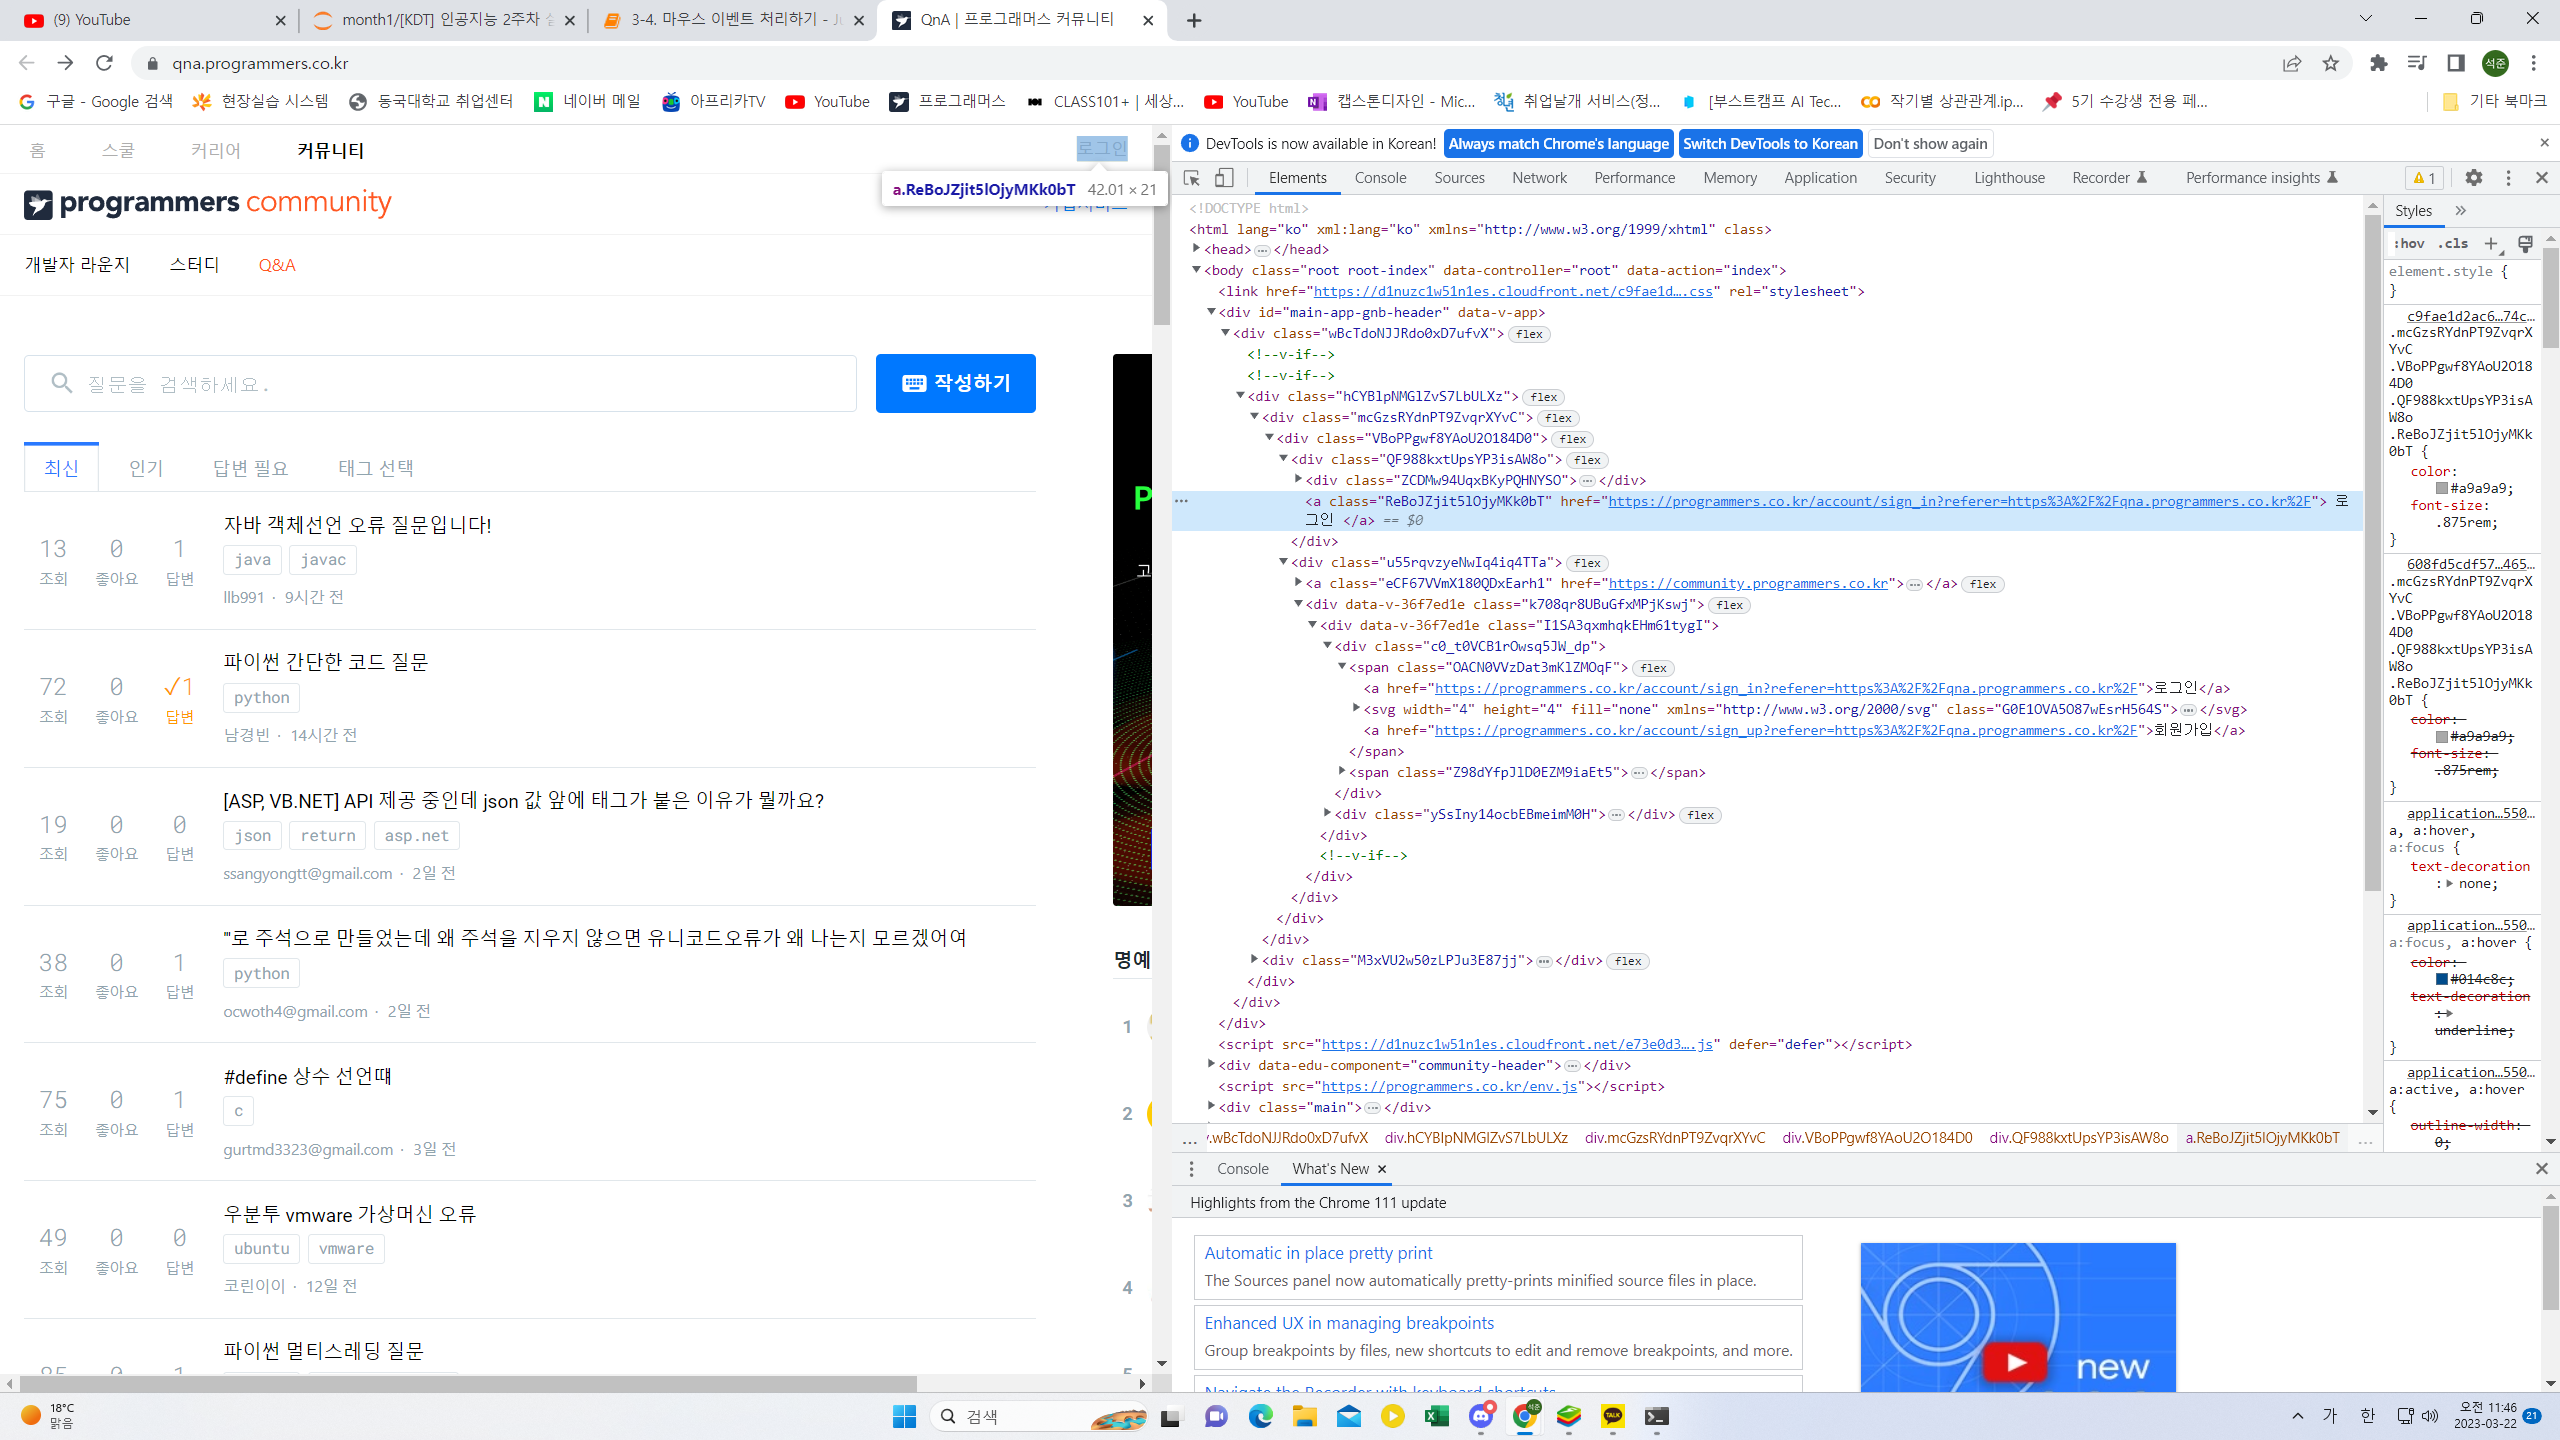

* 현재 강사님이 설명하는 html이 아마 수정이 된거같다.
* 여기서 class가 2개가 존재하는대 클래스가 계층구조로도 존재할 수있다고 한다. (class ="nav-link nav-signin")
* 따라서 nav-link안에있는 nav-signin이런식으로 html상에서 클래스를 사용함으로서 클래스간에 
* 계층구조를 만들 수도 있다. 그래서 실제로 스크래핑을 진행할 때는 nav-link.nav-signin 이런식으로 명시함으로서
* 저 태그를 가리킬 수있다. 이 요소를 어떻게 가지고 오고 클릭할 수있는지 알아보자  
<br>

* 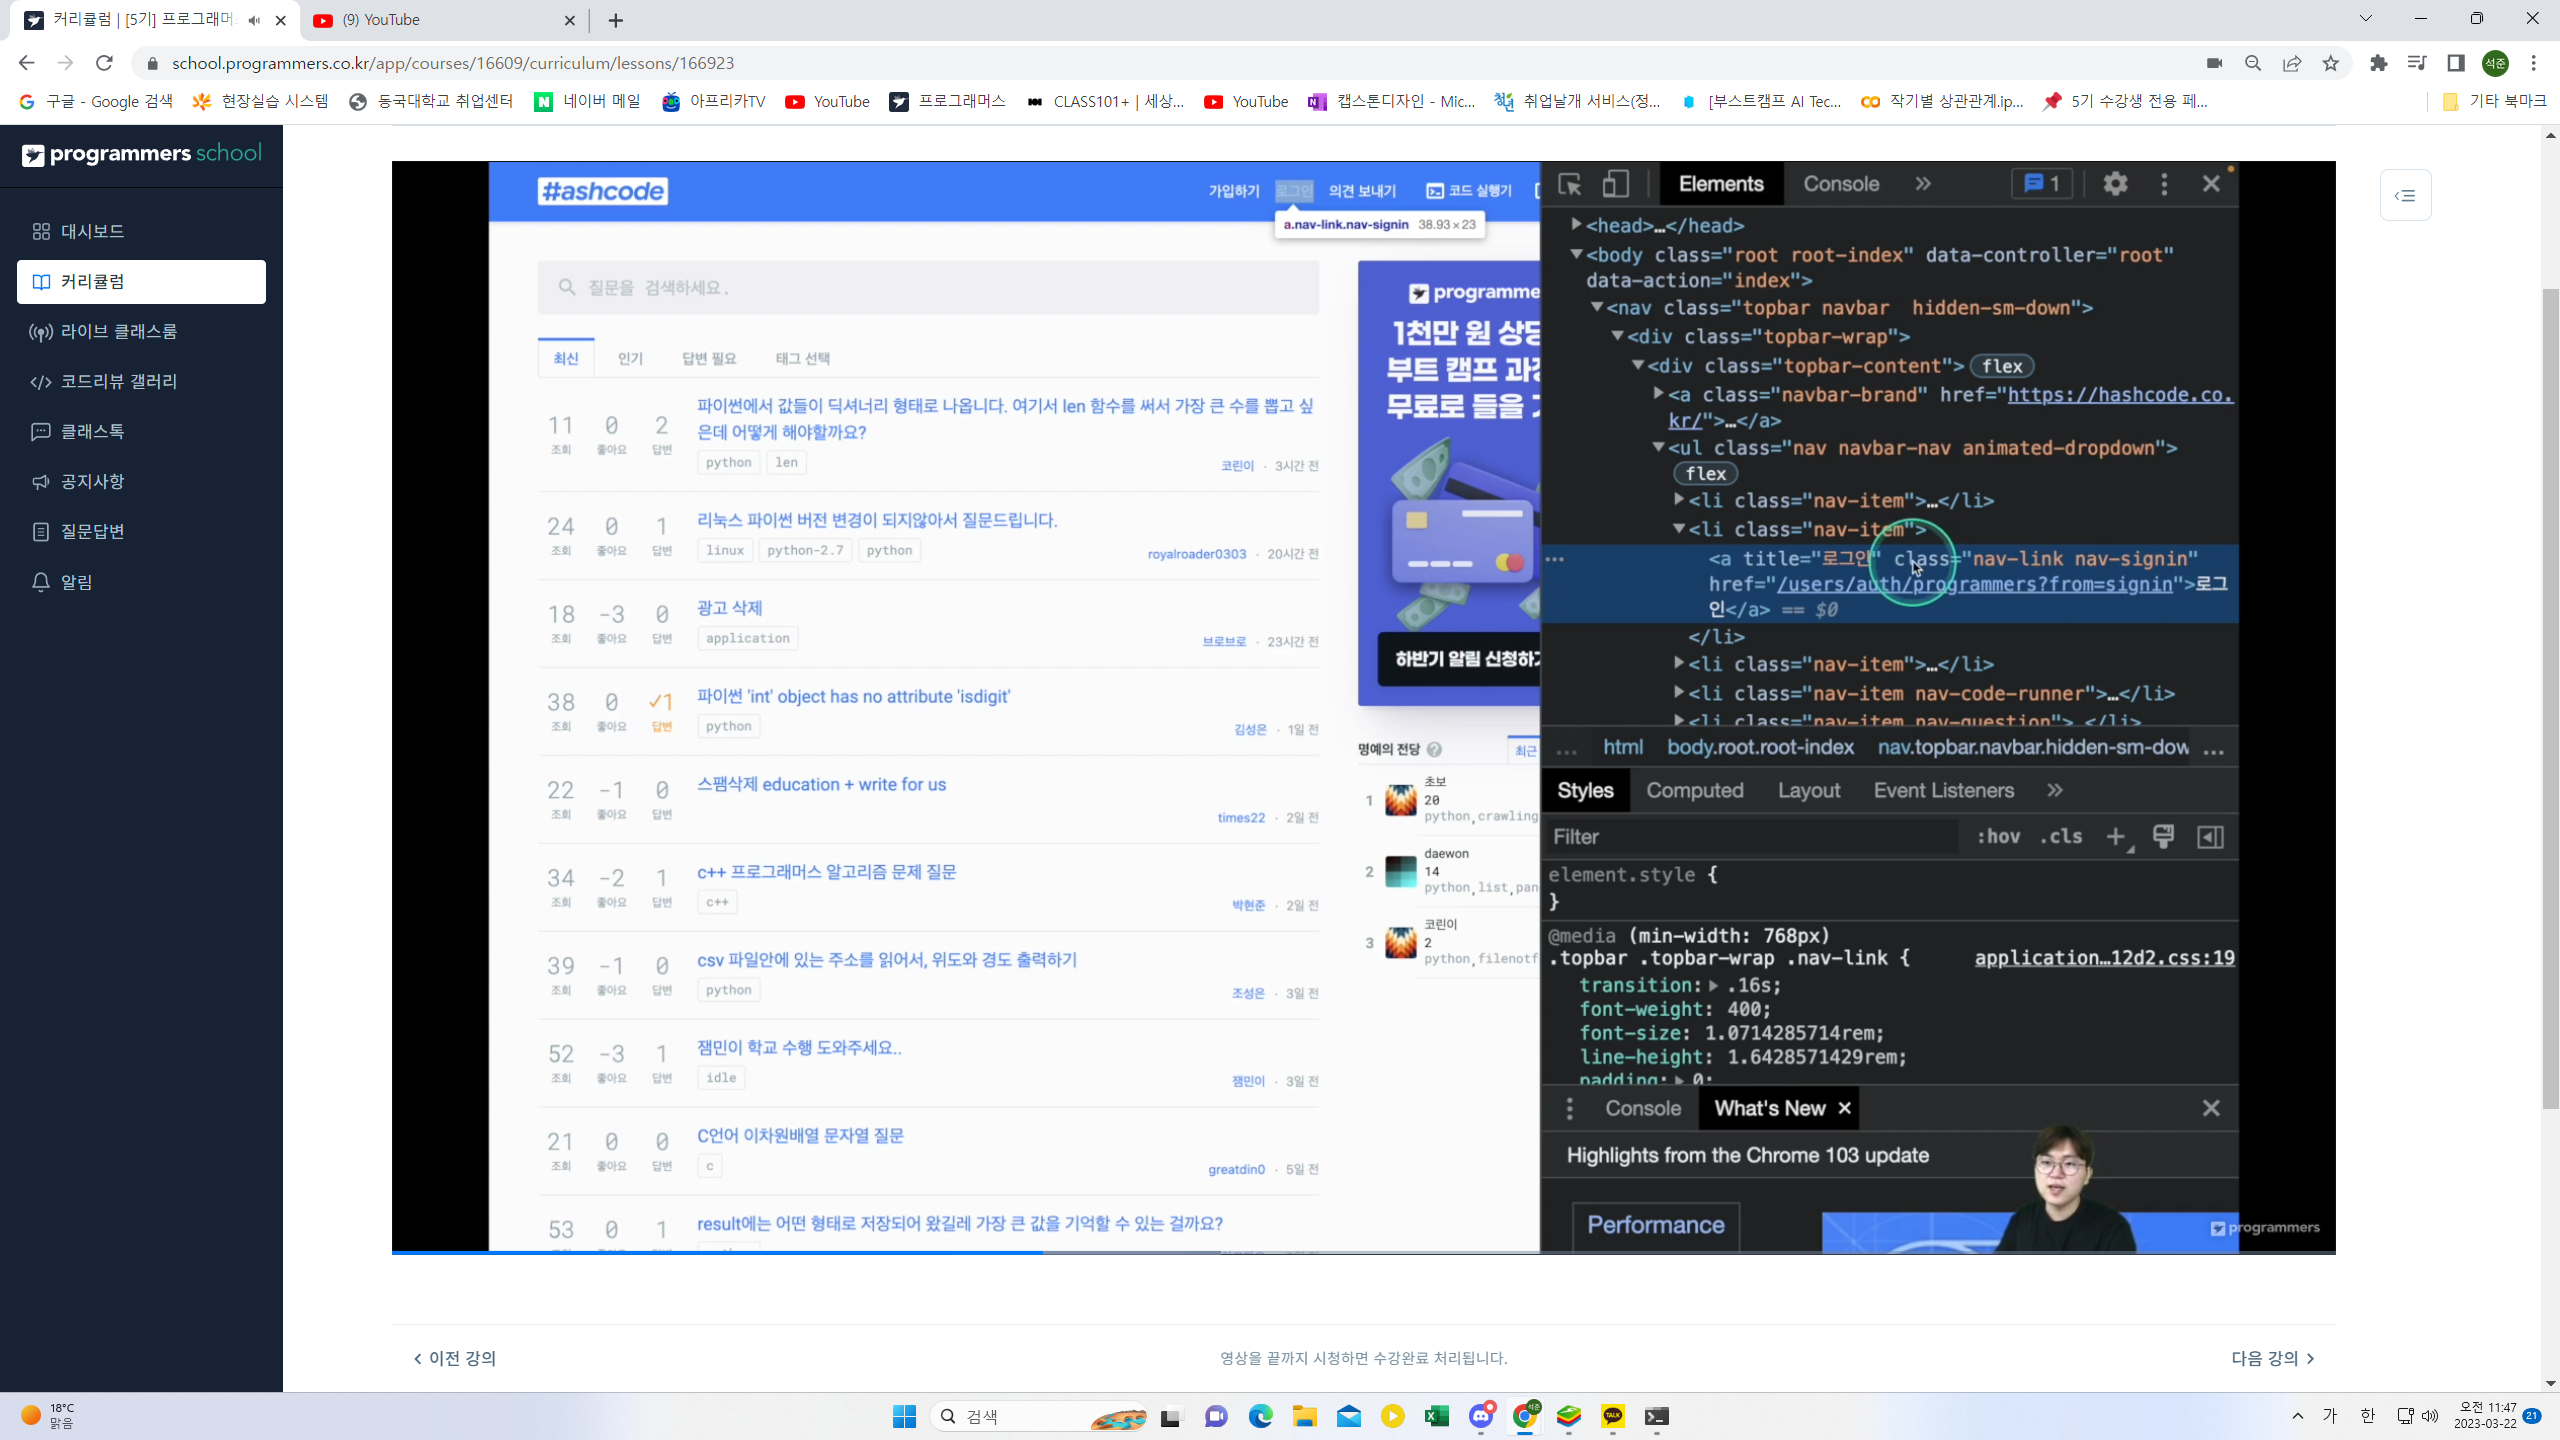

`<a>`태그는 anchor 태그라고 해서 버튼, 클릭을 했을때 이동할수있게 해주는 태그? 라고 생각하면 된다고 한다

### Mouse Event

웹 페이지에서 일어나는 일들을 Event라고 합니다.

마우스로 일어날 수 있는 대표적인 이벤트는 다음과 같습니다.

- 마우스 움직이기(move)
- 마우스 누르기(press down)
- 마우스 떼기(press up)
- ...


저희는 버튼을 찾은 후 이를 클릭하는 것을 목표로 합니다.  
마우스 입력은 크게 다음과 같은 과정을 거칩니다.

1. 입력하고자 하는 대상 요소를 찾습니다. (`find_element()` 이용) 그리고()안에는 by.id,XPATH...등을 넣고 해당하는 요소, target을 적을것이다.
2. 입력하고자 하는 내용을 `click`을 통해 전달합니다.
3. `.perform()`을 통해 동작합니다.

ActionChains는 Action에 Chain을 건다는 것이다. 클릭을 하고 엔터를 누른다고 했을때 이 2가지행동을
동시에 진행할수있게, 액션들을 연쇄적으로 수행할 수있게 해주는 객체라고 보면 된다.
예를들어 복사(crtl+c)의 경우 ctrl을 누른상태에서 c를 눌러야 하는대 이러한 것을 가능하게 해주는 것이
ActionChains이다. 그래서 여기서는 클릭하나만 나열했지만 열심히 체인을 쌓은 다음에, 예를들어
ActionChains(driver).click(button).click().click()....perform() 이렇게 click메서드를 나열한 다음에
마지막에 perform()을 실행해서 메소드를 한꺼번에 다 실행을 가능하게 해주는 객체라고 보면된다.

아래 예시는 `id`가 button인 요소를 클릭하는 예제입니다.
```python
button = driver.find_element(By.ID, "button")
ActionChains(driver).click(button).perform()
```

In [2]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [9]:
# 주어진 웹사이트를 누른 후, 우리가 원하는 버튼 요소를 찾은 후 마우스 이벤트를 실행시켜봅시다.

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://hashcode.co.kr/")
driver.implicitly_wait(3)

#button = driver.find_element(By.CLASS_NAME, "")
button = driver.find_element(By.XPATH, '//*[@id="main-app-gnb-header"]/div/div/div[1]/div/div[2]/div/div/div[1]/span[1]/a[1]')
print(button.text)
ActionChains(driver).click(button).perform()


로그인


CLASS_NAME으로 접근하는 경우 실습에 써져있는 방식으로 작동이 되지앟는다 아마  프로그래머스 홈페이지에서
class가 유동적인 변수이름으로 생성되도록 코드가 만들어져서 스크래핑이 제대로 동작하지않아 XPATH를 통해 접근하였다!

성공적으로 로그인 창에 진입했나요?  
이제 다음 실습에서 키보드 입력을 진행하는 방법에 대해서 학습해봅시다.

Tip: 이 외에도 사용할 수 있는 마우스 이벤트들이 많습니다. 다음 [링크](https://www.selenium.dev/documentation/webdriver/actions_api/mouse/)를 통해 확인하실 수 있어요!